###### The latest version of this IPython notebook is available at [http://github.com/jckantor/ESTM60203](http://github.com/jckantor/ESTM60203)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License (CC BY-NC-SA 4.0)](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Stochastic Price Models

This [IPython notebook](http://ipython.org/notebook.html) demonstrates the development and analysis of stochastic price models for commodity and financial goods.

### Initializations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import datetime
from pandas.io.data import DataReader

from IPython.core.display import HTML
HTML(open("styles/custom.css", "r").read())

## Where to get Price Data

Price data is available from a number of sources. Here we demonstrate the process of obtaining price data on financial goods from [Yahoo Finance](http://finance.yahoo.com/) and [Google Finance](https://www.google.com/finance), and downloading price data sets from [Quandl](http://www.quandl.com/).

### Yahoo Finance

[Yahoo Finance](http://finance.yahoo.com/) provides historical Open, High, Low, Close, and Volume date for quotes on traded securities. In addition, Yahoo Finance provides historical [Adjusted Close](http://marubozu.blogspot.com/2006/09/how-yahoo-calculates-adjusted-closing.html) price data that corrects for splits and dividend distributions. The Adjusted Close is a useful tool for computing the return on long-term investments.

The following cell demonstrates how to download historical Adjusted Close price for a selected security into a pandas DataFrame.

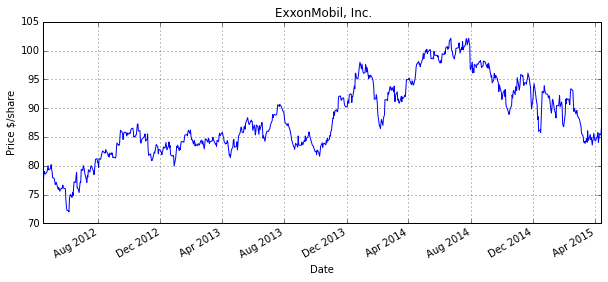

In [2]:
symbol = 'XOM'
description = 'ExxonMobil, Inc.'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

S = DataReader(symbol,"yahoo",start,end)['Adj Close']

plt.figure(figsize=(10,4))
S.plot()
plt.title(description)
plt.ylabel('Price $/share')

### Google Finance

[Google Finance](https://www.google.com/finance) provides historical Open, High, Low, Close, and Volume date for quotes on traded securities. The following cell demonstrates how to download historical Close price for a selected security into a pandas DataFrame.

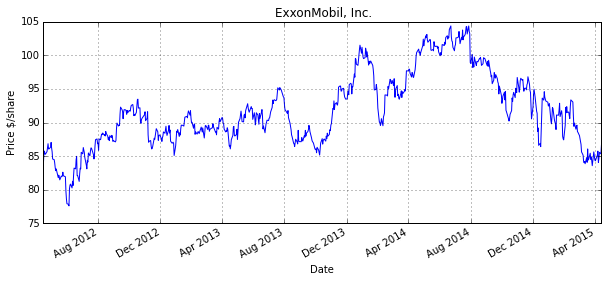

In [3]:
symbol = 'XOM'
description = 'ExxonMobil, Inc.'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

S = DataReader(symbol,"google",start,end)['Close']

plt.figure(figsize=(10,4))
S.plot()
plt.title(description)
plt.ylabel('Price $/share')

### Quandl

[Quandl](http://www.quandl.com/) is a searchable source of time-series data on a wide range of commodities, financials, and many other economic and social indicators. Data from Quandl can be downloaded as files in various formats, or accessed directly using the [Quandl API](http://www.quandl.com/help/api) or software-specific package. Here we use demonstrate use of the [Quandl Python package](http://www.quandl.com/help/packages#Python). 

The first step is execute a system command to check that the Quandl package has been installed.

In [4]:
!pip install Quandl

Here are examples of energy datasets. These were found by searching Quandl, then identifying the Quandl code used for accessing the dataset, a description, the name of the field containing the desired price information.

In [5]:
code = 'WSJ/NG_HH'
description = 'Cash commodity price for Natural Gas, Henry Hub. Units: $ per MMBTU'
field = 'Value'

code = 'OFDP/FUTURE_CL1'
description = 'NYMEX Crude Oil Futures, Continuous Contract #1 (CL1) (Front Month)'
field = 'Settle'

No authentication tokens found: usage will be limited.
See www.quandl.com/api for more information.
Returning Dataframe for  OFDP/FUTURE_CL1


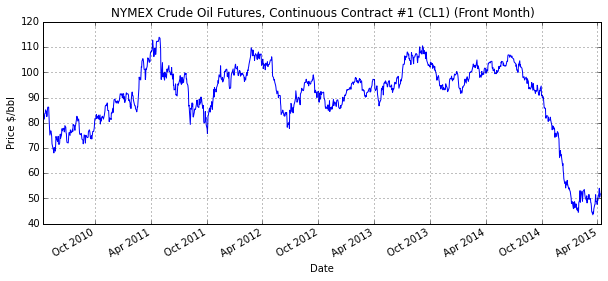

In [6]:
import Quandl

end = datetime.datetime.today().date()
start = end - datetime.timedelta(5*365)

S = Quandl.get(code, collapse='daily', \
    trim_start=start.isoformat(), trim_end=end.isoformat())[field]

plt.figure(figsize=(10,4))
S.plot()
plt.title(description)
plt.ylabel('Price $/bbl')

## Returns

The statistical properties of financial series are usually studied in terms of the change in prices. There are several reasons for this, key among them is that the changes can often be closely approximated as stationary random variables whereas prices are generally non-stationary sequences. 

A common model is 

$$S_{t+1} = R_{t} S_{t}$$

so, recursively,

$$S_{t+1} = R_{t} R_{t-1} \cdots R_{0} S_{0}$$

### Compounded (Log) Returns

Compounded, or log returns, are defined as

$$r^{log}_{t} = \log R_t = \log \frac{S_{t+1}}{S_{t}}$$

The log returns have a very useful compounding property for aggregating price changes across time

$$ \log \frac{S_{t+k}}{S_{t}} = r^{log}_{t} + r^{log}_{t+1} + \cdots + r^{log}_{t+k-1}$$

If the compounded returns are statistically independent and identically distributed, then this property provides a means to aggregate returns and develop statistical price projections.

### Linear Returns

Linear, or arithmetic returns, are defined as

$$S_{t+1} = \left(1 + r^{lin}_{t+1}\right) S_{t}$$

so that 

$$r^{lin}_{t} = \left(\frac{S_{t+1}}{S_{t}} - 1\right) = R_{t} - 1$$

Linear returns can be aggregated across a portfolio. Consider a portfolio composed of $N$ different assets that holds $x_{t,n}$ units of asset $n$ at time $t$. The value of portfolio at time $t$ is

$$W_t = x_{t,n} S_{t,1} + x_{t,n} S_{t,2} + \cdots x_{t,N} S_{t,N}$$

The value of the portfolio at time $t+1$ (before any rebalancing) is given by

$$\begin{align*}
W_{t+1} & = x_{t,1} S_{t+1,1} + x_{t,2} S_{t+1,2} + \cdots x_{t,N} S_{t+1,N} \\
& = x_{t,1}(1+r^{lin}_{t,1})S_{t,1} + x_{t,2}(1+r^{lin}_{t,2})S_{t,2} + \cdots + x_{t,N}(1+r^{lin}_{t,N})S_{t,N} \\
& = W_{t} + r^{lin}_{t,1}x_{t,1}S_{t,1} + r^{lin}_{t,2}x_{t,2}S_{t,2} + \cdots + r^{lin}_{t,N}x_{t,N}S_{t,N}
\end{align*}$$

Defining $w_{t,n}$ as the fraction of the portfolio's value invested in asset $n$ at time $t$

$$w_{t,n} = \frac{x_{t,n}S_{t,n}}{W_t}$$

gives the final result

$$\begin{align*}
r^{lin}_{t,W} & = \frac{W_{t+1}}{W_t} - 1 \\
& = w_{t,1}r^{lin}_{t,1} + w_{t,2}r^{lin}_{t,2} + \cdots + w_{t,N}r^{lin}_{t,N}
\end{align*}$$

showing that the linear return on the portfolio is a weighted linear sum of the linear returns on the individual assets.

### Volatility Drag and the Relationship between Linear and Log Returns

For long-term financial decision making, it's important to understand the relationship between $r_t^{log}$ and $r_t^{lin}$. Algebraically, the relationships are simple.

$$r^{log}_t = \log \left(1+r^{lin}_t\right)$$

$$r^{lin}_t = e^{r^{log}_t} - 1$$

The linear return $r_t^{lin}$ is the fraction of value that is earned from an asset in a single period. It is a direct measure of earnings. The average value $\bar{r}^{lin}$ over many periods this gives the average fractional earnings per period. If you care about consuming the earnings from an asset and not about growth in value, then $\bar{r}^{lin}$ is the quantity of interest to you.

Log return $r_t^{log}$ is the rate of growth in value of an asset over a single period. When averaged over many periods, $\bar{r}^{log}$ measures the compounded rate of growth of valuu. If you care about the growth in value of an asset, then $\bar{r}^{log}$ is the quantity of interest to you.

The compounded rate of growth $r_t^{log}$ is generally smaller than average linear return $\bar{r}^{lin}$ due to the effects of volatility. To see this, consider an asset that has a linear return of -50% in period 1, and +100% in period 2. The average linear return is would be +25%, but the compounded growth in value would be 0%.

A general formula for the relationship between $\bar{r}^{log}$ and $\bar{r}^{lin}$ is derived as follows:

$$\begin{align*}
\bar{r}^{log} & = \frac{1}{T}\sum_{t=0}^{T-1} r_t^{log} \\
& = \frac{1}{T}\sum_{t=0}^{T-1} \log\left(1+r_t^{lin}\right) \\
& = \frac{1}{T}\sum_{t=0}^{T-1} \left(\log(1) + r_t^{lin} - \frac{1}{2} (r_t^{lin})^2 + \cdots
\right) \\
& = \frac{1}{T}\sum_{t=0}^{T-1} r_t^{lin} - \frac{1}{2}\frac{1}{T}\sum_{t=0}^{T-1} (r_t^{lin})^2 + \cdots \\
& = \bar{r}^{lin} - \frac{1}{2}\left(\frac{1}{T}\sum_{t=0}^{T-1} (r_t^{lin})^2\right) + \cdots \\
& = \bar{r}^{lin} - \frac{1}{2}\left((\bar{r}^{lin})^2 + \frac{1}{T}\sum_{t=0}^{T-1} (r_t^{lin}-\bar{r}^{lin})^2\right) + \cdots
\end{align*}$$

For typical values $\bar{r}^{lin}$ of and long horizons $T$, this results in a formula

$$\begin{align*}
\bar{r}^{log} & \approx \bar{r}^{lin} - \frac{1}{2} \left(\sigma^{lin}\right)^2
\end{align*}$$

where $\sigma^{lin}$ is the standard deviation of linear returns, more commonly called the volatility.

The difference $- \frac{1}{2} \left(\sigma^{lin}\right)^2$ is the _volatility drag_ imposed on the compounded growth in value of an asset due to volatility in linear returns. This can be significant and a source of confusion for many investors. 

It's indeed possible to have a positive average linear return, but negative compounded growth.  To see this, consider a \$100 investment which earns 20% on even-numbered years, and loses 18% on odd-numbered years. The average linear return is 1%, and the average log return is -0.81%.



### Computing Linear and Log Returns

Given the price data stored as a pandas `DataSeries` `S`, a corresponding data series for returns is computed using the pandas `shift()` function, followed by the `dropna()` function to remove missing values.

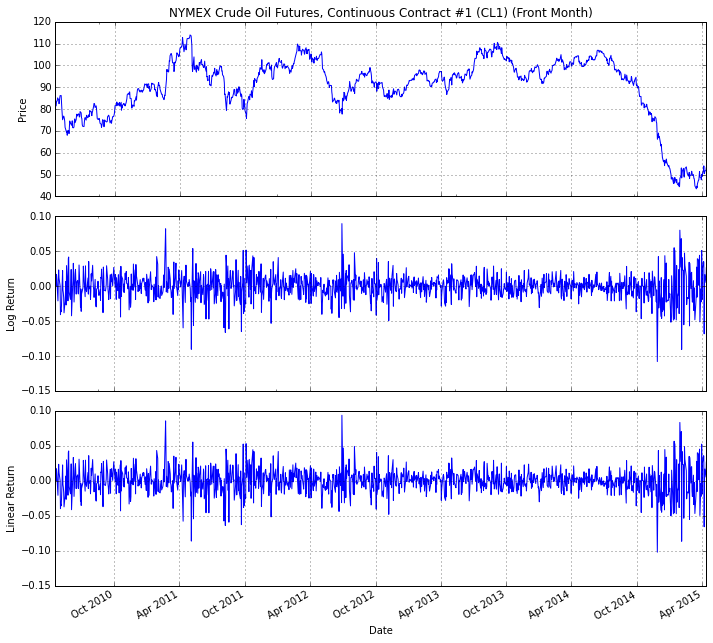

In [7]:
rLog = (np.log(S/S.shift(+1))).dropna()
rLin = (S/S.shift(+1)).dropna() - 1.0

plt.figure(figsize=(10,9))
plt.subplot(3,1,1)
S.plot()
plt.ylabel('Price')
plt.title(description)

plt.subplot(3,1,2)
rLog.plot()
plt.ylabel('Log Return')

plt.subplot(3,1,3)
rLin.plot()
plt.ylabel('Linear Return')

plt.tight_layout()

In [8]:
print "Mean Linear Return = {0:.6f}".format(rLin.mean())
print "Linear Volatility = {0:.6f}".format(rLin.std())
print "Volatility Drag -0.5*vol**2 = {0:.6f}".format(-0.5*rLin.std()**2)
print "rLin - 0.5*vol = {0:.6f}\n".format(rLin.mean() - 0.5*rLin.std()**2)

print "Mean Log Return = {0:.6f}".format(rLog.mean())

Mean Linear Return = -0.000185
Linear Volatility = 0.018409
Volatility Drag -0.5*vol**2 = -0.000169
rLin - 0.5*vol = -0.000355

Mean Log Return = -0.000355


## Statistical Properties of Returns

### Distribution of Returns

A basic assumption in developing developing stochastic price models is that the residuals are indepdendent and identically distributed (i.i.d.) random variates.  Here we show the results of several common statistical tests that would screen out non-i.i.d. random variates.

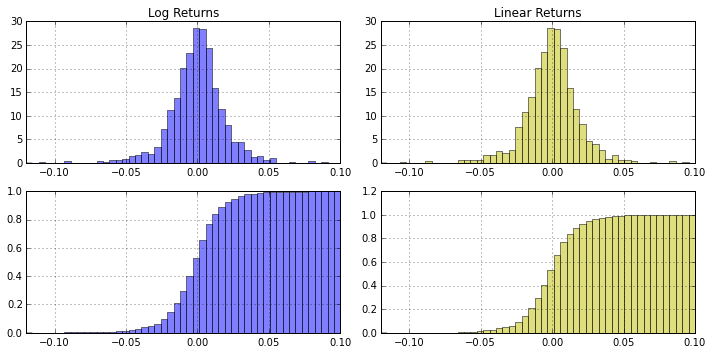

In [9]:
bins = np.linspace(-0.12,0.10,50)
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
rLog.hist(bins=bins, normed=True, color='b', alpha=0.5)
plt.xlim(bins.min(),bins.max())
plt.title('Log Returns')

plt.subplot(2,2,3)
rLog.hist(bins=bins, normed=True, cumulative=True, color='b',alpha=0.5)
plt.xlim(bins.min(),bins.max())

plt.subplot(2,2,2)
rLin.hist(bins=bins, normed=True, color='y', alpha=0.5)
plt.xlim(bins.min(),bins.max())
plt.title('Linear Returns')

plt.subplot(2,2,4)
rLin.hist(bins=bins, normed=True, cumulative=True, color='y',alpha=0.5)
plt.xlim(bins.min(),bins.max())

plt.tight_layout()

### Distribution of First Half versus Second Half of the Data Set

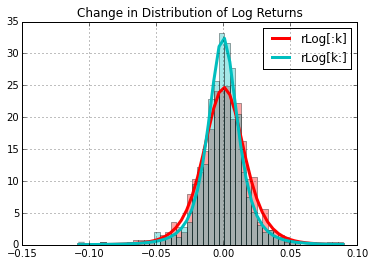

In [10]:
from scipy.stats import t

k = int(len(rLog)/2)
r = np.linspace(rLog.min(),rLog.max())

plt.figure();
plt.hold(True)

param = t.fit(rLog[:k])
rLog[:k].hist(bins=r,normed=1,alpha=0.35,color='r')
plt.plot(r,t.pdf(r,df=param[0],loc=param[1],scale=param[2]),'r-',lw=3);

rLog[k:].hist(bins=r,normed=1,alpha=0.35,color='c')
param = t.fit(rLog[k:])
plt.plot(r,t.pdf(r,df=param[0],loc=param[1],scale=param[2]),'c-',lw=3);
plt.hold(False)

plt.legend(['rLog[:k]','rLog[k:]'])
plt.title('Change in Distribution of Log Returns')

### Lag Plot of $r^{log}_{t+1}$ versus $r^{log}_t$

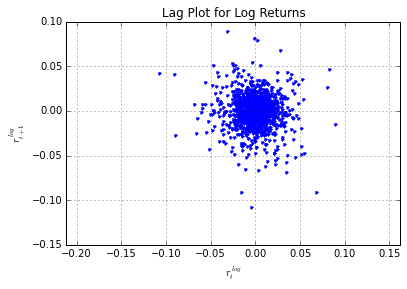

In [11]:
plt.plot(rLog[0:-1],rLog[1:],'.')
plt.axis('equal');
plt.xlabel('$r^{log}_{t}$')
plt.ylabel('$r^{log}_{t+1}$')
plt.grid()
plt.title('Lag Plot for Log Returns');

### Autocorrelation

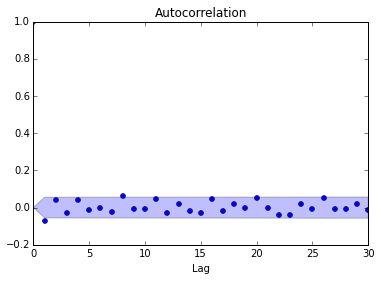

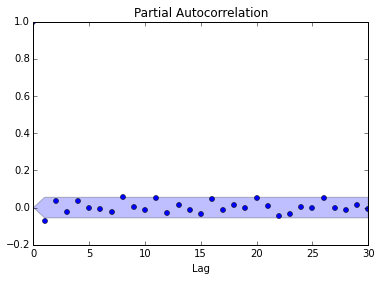

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(rLog,lags=min(30,len(rLog)));
plt.xlabel('Lag');
plot_pacf(rLog,lags=min(30,len(rLog)));
plt.xlabel('Lag');

## Price Forecasting using the Bootstrap

Our basic model for prices is 

$$S_{t+1} = R_{t}S_{t}$$ 

where $R_{t}$ represent total return and are assumed to be independent and identically distributed random variates. Previously we have computed log and linear returns as

$$r^{log}_{t} = \log \frac{S_{t+1}}{S_{t}} = \log R_t$$

$$r^{lin}_{t} = \frac{S_{t+1} - S_{t}}{S_{t}} = R_t - 1$$

and executed several tests of the hypothesis that they behave as independent, identically distributed (i.i.d.) random variables. If we're satisfied with this hypothesis, then we can randomly sample the historical return data $R_{t}$ to simulate future prices.  This bootstrap technique is relatively simple to implement as shown below.

### Trading Days

Typical sources of price data report information for trading days. Most years will have between 251 and 253 trading days. For the purpose of price forecasting, therefore, we create python functions for generating trading days for future years using the New York Stock Exchange calendar. These functions are implemented using rule sets from `dateutil` library.

In [13]:
from dateutil import rrule 
import datetime

# Generate ruleset for holiday observances on the NYSE

def NYSE_holidays(a=datetime.date.today(), b=datetime.date.today()+datetime.timedelta(days=365)):
    rs = rrule.rruleset()

    # Include all potential holiday observances
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=31, byweekday=rrule.FR)) # New Years Day  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, bymonthday= 1))                     # New Years Day  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, bymonthday= 2, byweekday=rrule.MO)) # New Years Day    
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, byweekday= rrule.MO(3)))            # Martin Luther King Day   
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 2, byweekday= rrule.MO(3)))            # Washington's Birthday
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, byeaster= -2))                                  # Good Friday
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 5, byweekday= rrule.MO(-1)))           # Memorial Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 3, byweekday=rrule.FR)) # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 4))                     # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 5, byweekday=rrule.MO)) # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 9, byweekday= rrule.MO(1)))            # Labor Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=11, byweekday= rrule.TH(4)))            # Thanksgiving Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=24, byweekday=rrule.FR)) # Christmas  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=25))                     # Christmas  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=26, byweekday=rrule.MO)) # Christmas 
    
    # Exclude potential holidays that fall on weekends
    rs.exrule(rrule.rrule(rrule.WEEKLY, dtstart=a, until=b, byweekday=(rrule.SA,rrule.SU)))

    return rs
    
# Generate ruleset for NYSE trading days

def NYSE_tradingdays(a=datetime.date.today(), b=datetime.date.today()+datetime.timedelta(days=365)):
    rs = rrule.rruleset()
    rs.rrule(rrule.rrule(rrule.DAILY, dtstart=a, until=b))
    
    # Exclude weekends and holidays
    rs.exrule(rrule.rrule(rrule.WEEKLY, dtstart=a, byweekday=(rrule.SA,rrule.SU)))
    rs.exrule(NYSE_holidays(a,b))
    
    return rs

# Examples

# List all NYSE holiday observances for the coming year
print "NYSE Holidays\n"
for dy in NYSE_holidays():
    print dy.strftime('%b %d %Y')

# Count NYSE trading days in next 5 years
print "\n\nTrading Days\n"
for yr in range(2015,2020):
    tdays = len(list(NYSE_tradingdays(datetime.datetime(yr,1,1),datetime.datetime(yr,12,31))))
    print "{0}  {1}".format(yr,tdays)

NYSE Holidays

May 25 2015
Jul 03 2015
Sep 07 2015
Nov 26 2015
Dec 25 2015
Jan 01 2016
Jan 18 2016
Feb 15 2016
Mar 25 2016


Trading Days

2015  252
2016  252
2017  251
2018  252
2019  252


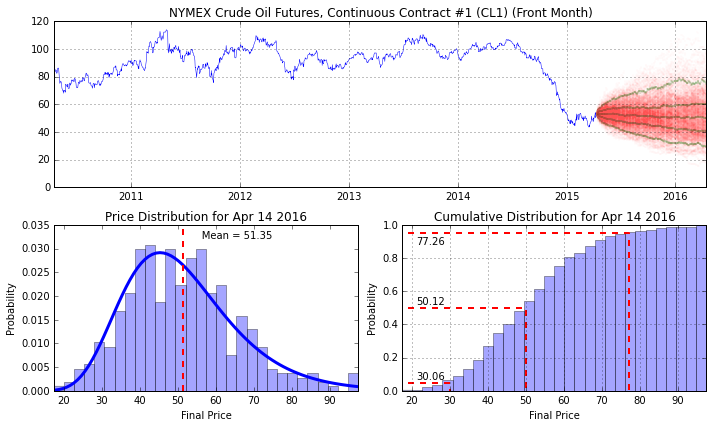

In [18]:
from scipy.stats import lognorm

N = 400
#start_date = S.index[-252]
start_date = S.index[-1]
end_date = datetime.date.today() + datetime.timedelta(days=365)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)

plt.plot(S.index,S,lw=0.5)
plt.title(description)

# Initialize P using the last available price
P = np.array([S.ix[start_date]]*N)

# The generator returns one array of N random samples from the history of total returns
# for each t in the history of future horizon.
R = (S/S.shift(+1)).dropna() #[0:start_date]
Zgenerator = ((d,np.array([np.random.choice(R) for _ in xrange(N)])) 
                for d in NYSE_tradingdays(start_date,end_date))

plt.hold(True)
for d,Z in Zgenerator:
    P *= Z
    plt.plot([d]*N,P,'r.',ms=0.1,alpha=0.6)
    plt.plot([d]*5,np.percentile(P,[95,75,50,25,5]),'g.',ms=0.8,alpha=0.6)
    
plt.hold(False)
plt.grid()
plt.ylim(0,plt.ylim()[1])

# Histogram
plt.subplot(2,2,3)
plt.hold(True)
plt.hist(P,bins=min(100,int(1.5*np.sqrt(N))),normed=1,alpha=0.35,color='b');
shape,loc,scale = lognorm.fit(P,floc=0)
x=np.linspace(0,max(P),100)
pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale) # fitted distribution
plt.plot(x,pdf_fitted,'b-',lw=3)
p = np.mean(P)
ylim = plt.ylim()
plt.plot([p,p],ylim,'r--',lw=2)
plt.ylim(ylim)
plt.text(p,0.97*ylim[1],"      Mean = {0:.2f}".format(p),va = 'top')
plt.hold(False)

plt.xlim(min(P),max(P))
plt.xlabel('Final Price')
plt.ylabel('Probability');
plt.title("Price Distribution for {1}".format(description,d.strftime("%b %d %Y")))

# Cumulative Distribution
plt.subplot(2,2,4)
nbins = min(100,int(1.5*np.sqrt(N)))
plt.hist(P,bins=nbins,normed=1,cumulative=True,alpha=0.35,color='b');
plt.xlim(min(P),max(P))
plt.xlabel('Final Price')
plt.ylabel('Probability');
plt.title("Cumulative Distribution for {1}".format(description,d.strftime("%b %d %Y")))

def plotPercentile(p,va='baseline'):
    x = np.percentile(P,100.0*p)
    dp = -0.02 if va=='top' else 0.02
    plt.text(min(P) + 0.05*(max(P)-min(P)),p+dp,'{0:.2f}'.format(x),ha='left',va=va)
    plt.plot([0,x,x],[p,p,0],'r--',lw=2)

plt.hold(True)
plotPercentile(0.05)
plotPercentile(0.50)
plotPercentile(0.95,va='top')
plt.hold(False)
plt.grid()
plt.tight_layout()

plt.savefig('img/StochasticPriceModelBootstrap.png')

## Geometric Brownian Motion

$$S_{t+1} = S_t + \mu h S_t + \sigma \sqrt{h} S_t Z_t$$

where $Z_t \sim N(0,1)$ and $h$ corresponds to a sampling period of 1 'trading day'. There are typically 252 trading days in a calendar year, 63 trading days in a quarter, and 21 trading days in a month.

Defining return as

$$r^{lin}_{t} = \frac{S_{t+1} - S_{t}}{S_{t}} = \mu h + \sigma \sqrt{h} Z_t$$

then the statistical model for $r^{lin}_{t}$ becomes

$$r^{lin}_{t} = \mu h + \sigma \sqrt{h} Z_t$$

For the case of Geometric Brownian Motion the hypothesis is that $r^{lin}_t$ is a random variable drawn from a the normal distribution $r^{lin}_t \sim N(\mu h, \sigma\sqrt{h}$).

TypeError: _parse_args() got an unexpected keyword argument 'args'

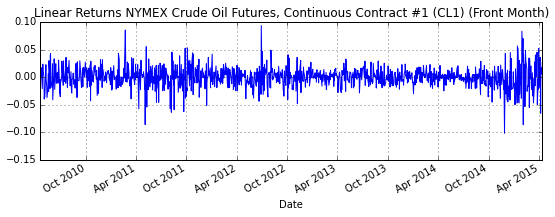

In [19]:
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

rLin = (S/S.shift(+1)).dropna() - 1.0
(mu,sigma) = norm.fit(rLin)
rv = norm(mu, sigma )

def plotFittedReturns(r,description = '',rv=norm):
    
    # plot returns
    plt.figure(figsize=(9,6))
    plt.subplot(2,1,1)
    r.plot()
    plt.title(description)
    
    # fit returns to a given distribution
    params = rv.fit(r)
    rv = rv(args=params)

    ax = plt.subplot(2,2,3)
    plt.hold(True)
    rSpace = np.linspace(r.min(),r.max())
    print rv.pdf(rSpace)
    r.hist(bins=rSpace,normed=1,alpha=0.4);
    plt.plot(rSpace,rv.pdf(rSpace),'r-',lw=3,alpha=0.6)
    plt.text(0.06,0.85,"mean = {0:.3}".format(rv.mean()),transform=ax.transAxes)
    plt.text(0.06,0.75,"std = {0:.3}".format(rv.std()),transform=ax.transAxes)
    plt.grid(False)
    plt.hold(False)
    plt.xlabel('$r^{log}_t$')
    plt.title('Histogram of Returns')

    ax = plt.subplot(2,2,4)
    plt.axis('equal')
    plt.hold(True)
    #qqplot(r,dist=t,distargs=(df,), loc=mu, scale=scale,line='45',ax=ax)
    plt.hold(False)
    plt.title('qqplot')
    plt.tight_layout()
    
    return rv

plotFittedReturns(rLin,'Linear Returns ' + description,t);


In [276]:
from scipy.stats import norm,t

a = norm.fit(rLin)
b = t.fit(rLin)
print a
q = norm(loc=a[-2],scale=a[-1])
q.pdf([0.01, 0.02, 0.03, 0.04])



(-0.0001528906763003357, 0.016887191281517788)


array([ 19.71795263,  11.59042784,   4.79786241,   1.39864271])

252 3.92795122383 0.26807585084
0.267894472265 0 50.4745809156


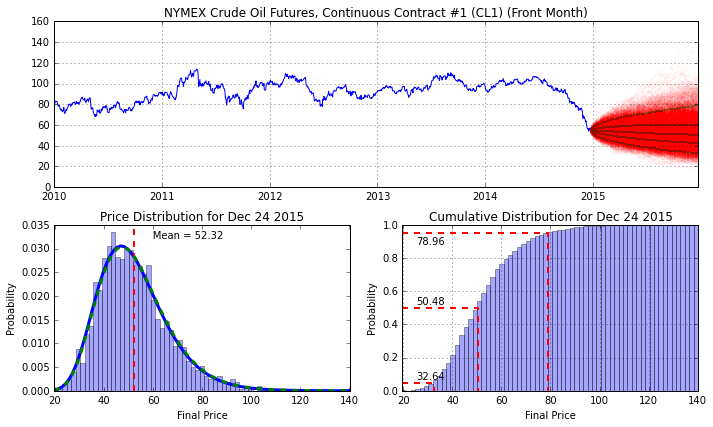

In [104]:
N = 2000    # number of realizations
T = 252    # simulation time horizon in trading days
h = 1

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(S.index,S)
plt.title(description)

start_date = S.index[-1]
end_date = start_date + datetime.timedelta(365)

# Initialize P
P = np.array([S[-1]]*N)

# generator of random variates
Zgenerator = ((d,np.array(norm.rvs(loc=mu*h,scale=np.sqrt(h)*sigma,size=N)))
              for d in NYSE_tradingdays(start_date,end_date))

plt.hold(True)
for (d,Z) in Zgenerator:
    P += P*Z
    plt.plot([d]*N,P,'r.',ms=0.1,alpha=0.5)
    plt.plot([d]*5,np.percentile(P,[95,75,50,25,5]),'g.',ms=0.8,alpha=0.6)
    
plt.hold(False)
plt.grid()
plt.ylim(0,plt.ylim()[1])

# Histogram
plt.subplot(2,2,3)
plt.hold(True)
plt.hist(P,bins=min(100,int(1.5*np.sqrt(N))),normed=1,alpha=0.35,color='b');
shape,loc,scale = lognorm.fit(P,floc=0)
x=np.linspace(0,max(P),100)
pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale) # fitted distribution
plt.plot(x,pdf_fitted,'b-',lw=3)
p = np.mean(P)
ylim = plt.ylim()
plt.plot([p,p],ylim,'r--',lw=2)
plt.ylim(ylim)
plt.text(p,0.97*ylim[1],"      Mean = {0:.2f}".format(p),va = 'top')

T = len(list(NYSE_tradingdays(start_date,end_date)))

alpha = np.log(S[-1]) + (mu-sigma*sigma/2.0)*T
beta = sigma*np.sqrt(T)
pdf_pred = lognorm.pdf(x, beta, loc=0, scale=np.exp(alpha)) # fitted distribution
plt.plot(x,pdf_pred,'g--',lw=3)

print T,alpha,beta
print shape,loc,scale

plt.hold(False)

plt.xlim(min(P),max(P))
plt.xlabel('Final Price')
plt.ylabel('Probability');
plt.title("Price Distribution for {1}".format(description,d.strftime("%b %d %Y")))

# Cumulative Distribution
plt.subplot(2,2,4)
nbins = min(100,int(1.5*np.sqrt(N)))
plt.hist(P,bins=nbins,normed=1,cumulative=True,alpha=0.35,color='b');
plt.xlim(min(P),max(P))
plt.xlabel('Final Price')
plt.ylabel('Probability');
plt.title("Cumulative Distribution for {1}".format(description,d.strftime("%b %d %Y")))

def plotPercentile(p,va='baseline'):
    x = np.percentile(P,100.0*p)
    dp = -0.02 if va=='top' else 0.02
    plt.text(min(P) + 0.05*(max(P)-min(P)),p+dp,'{0:.2f}'.format(x),ha='left',va=va)
    plt.plot([0,x,x],[p,p,0],'r--',lw=2)

plt.hold(True)
plotPercentile(0.05)
plotPercentile(0.50)
plotPercentile(0.95,va='top')
plt.hold(False)
plt.grid()
plt.tight_layout()

plt.savefig('img/StochasticPriceModelGBM.png')

## Price Forecasting with a Student's t-Distribution for Log Returns

The definition of log returns can be rearranged to a recursive form

$$\log S_{t+1} = \log S_{t} + r^{log}_{t}$$

Assuming log returns are independent and identically distributed, we begin by fitting a Student's T-distribution

$$f(r | \nu,\mu,s) = \frac{\Gamma(\frac{\nu+1}{2})}{s\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}}\left(1+\frac{1}{\nu}\left(\frac{r-\mu}{s}\right)^2\right)^{-\frac{\nu+1}{2}}$$

to historical data. This particular version of the distribution is presented in 'location-scale' form where $\nu$ denotes the 'degrees of freedom', $\mu$ is location, and $s$ is scale. The distribution is frequently used to model heavy tailed data where the degrees of freedom controls and scale parameters controls kurtosis. The Student's t-distribution is symmetric around $\mu$ (which is the mean, median, and mode of the distribution). Smaller values of $\nu$ correspond to heavier tails.  Key statistics for the distribution are

$$\begin{align*}
E[r] & = \mu \quad\mbox{for}\quad \nu > 1 \\
\mbox{Var}[r] & = s^2\frac{\nu}{\nu-2} \quad\mbox{for}\quad \nu > 2
\end{align*}$$


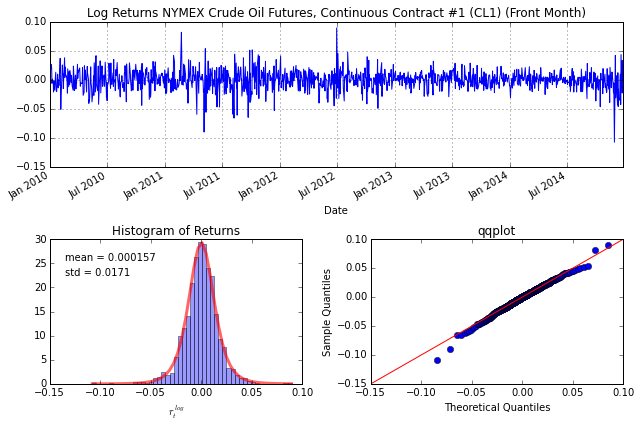

In [214]:
from scipy.stats import t

# compute log returns, fit to t-distribution and freeze 
rLog = np.log(S/S.shift(+1)).dropna() 
df,mu,scale = t.fit(rLog)
rv = t(df=df,loc=mu,scale=scale)

plotFittedReturns(rLog,rv,'Log Returns ' + description)

In [215]:
qqplot?

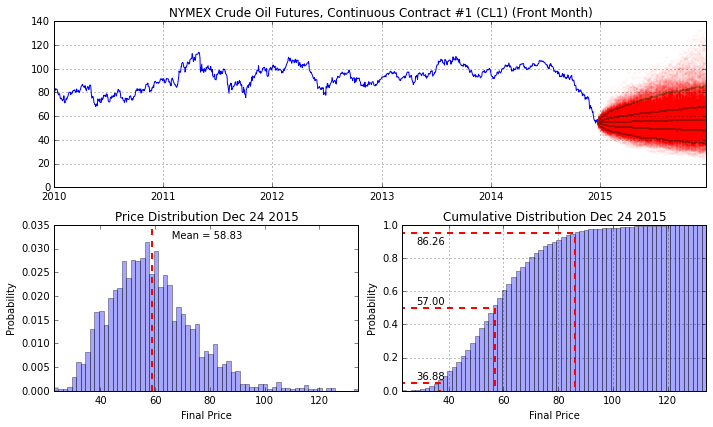

In [190]:
N = 2000     # number of realizations
H = 365      # simulation horizon in calendar days

# initialize simulation
start_date = S.index[-1]
end_date = start_date + datetime.timedelta(H)
P = np.array([np.log(S[-1])]*N)

# create generator for N samples for each trading day
Zgenerator = ((d,np.array(rv.rvs(size=N))) 
              for d in NYSE_tradingdays(start_date,end_date))

# do simulation and plot results
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.hold(True)
plt.plot(S.index,S)

for (d,Z) in Zgenerator:
    P += Z
    plt.plot([d]*N,np.exp(P),'r.',ms=0.1,alpha=0.6)
    plt.plot([d]*5,np.percentile(np.exp(P),[95,75,50,25,5]),'g.',ms=0.8,alpha=0.5)
    
plt.hold(False)
plt.ylim(0,plt.ylim()[1])
plt.grid()
plt.title(description)

P = np.exp(P)

# histogram
plt.subplot(2,2,3)
plt.hold(True)
nbins = min(100,int(1.5*np.sqrt(N)))
plt.hist(P,bins=nbins,normed=1,alpha=0.35,color='b');
ylim = plt.ylim()
plt.plot([P.mean(),P.mean()],ylim,'r--',lw=2)
plt.ylim(ylim)
plt.text(p,0.97*ylim[1],"      Mean = {0:.2f}".format(P.mean()),va = 'top')

#T = len(list(NYSE_tradingdays(start_date,end_date)))
#alpha = np.log(S[-1]) + (mu-sigma*sigma/2.0)*T
#beta = sigma*np.sqrt(T)
#pdf_pred = lognorm.pdf(x, beta, loc=0, scale=np.exp(alpha)) # fitted distribution
#plt.plot(x,pdf_pred,'g--',lw=3)
plt.hold(False)
plt.xlim(min(P),max(P))
plt.xlabel('Final Price')
plt.ylabel('Probability');
plt.title("Price Distribution {0}".format(d.strftime("%b %d %Y")))

# Cumulative Distribution
plt.subplot(2,2,4)
plt.hist(P,bins=nbins,normed=1,cumulative=True,alpha=0.35,color='b');
plt.xlim(min(P),max(P))
plt.ylim(0,1)
plt.xlabel('Final Price')
plt.ylabel('Probability');
plt.title("Cumulative Distribution {0}".format(d.strftime("%b %d %Y")))

def plotPercentile(p,va='baseline'):
    x = np.percentile(P,100.0*p)
    dp = -0.02 if va=='top' else 0.02
    plt.text(min(P) + 0.05*(max(P)-min(P)),p+dp,'{0:.2f}'.format(x),ha='left',va=va)
    plt.plot([0,x,x],[p,p,0],'r--',lw=2)

plt.hold(True)
plotPercentile(0.05)
plotPercentile(0.50)
plotPercentile(0.95,va='top')
plt.hold(False)
plt.grid()
plt.tight_layout()

plt.savefig('img/StochasticPriceModelLogT.png')

## Regressing Returns to Alternative Models

In [ ]:
df = pd.DataFrame({'S':S,'R':R}, index = R.index)

In [ ]:
df = pd.DataFrame({'Price':S,'LnS':log(S),'Return':R})
df = df[~isnan(df['Return'])]
#plot(df['LnS'],df['Return'],'.')

import statsmodels.api as sm
df = sm.add_constant(df)
mod = sm.OLS(df['Return'],df[['const','LnS']])
res = mod.fit()
print res.summary()
print res.params
res.resid.plot()